<a href="https://colab.research.google.com/github/Mohamedkhaled2310/ML-Task-1/blob/main/Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
sonar_data = pd.read_csv("sonar_data.csv")

In [3]:
sonar_data.shape

(207, 61)

In [4]:
sonar_data.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [6]:
sonar_data.isnull().sum()

,0
0.0200,0
0.0371,0
0.0428,0
0.0207,0
0.0954,0
...,...
0.0180,0
0.0084,0
0.0090,0
0.0032,0


In [43]:
sonar_data.duplicated().sum()

0

In [12]:
x=sonar_data.drop(sonar_data.columns[-1],axis=1)
y=sonar_data.iloc[:, -1]

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import seaborn as sns

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [35]:
model =LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [36]:
y_predict = model.predict(x_test)

Accuracy: 0.746031746031746
Confusion Matrix:
[[24 12]
 [ 4 23]]
Classification Report:
{'M': {'precision': 0.8571428571428571, 'recall': 0.6666666666666666, 'f1-score': 0.75, 'support': 36.0}, 'R': {'precision': 0.6571428571428571, 'recall': 0.8518518518518519, 'f1-score': 0.7419354838709677, 'support': 27.0}, 'accuracy': 0.746031746031746, 'macro avg': {'precision': 0.7571428571428571, 'recall': 0.7592592592592593, 'f1-score': 0.7459677419354839, 'support': 63.0}, 'weighted avg': {'precision': 0.7714285714285714, 'recall': 0.746031746031746, 'f1-score': 0.7465437788018433, 'support': 63.0}}


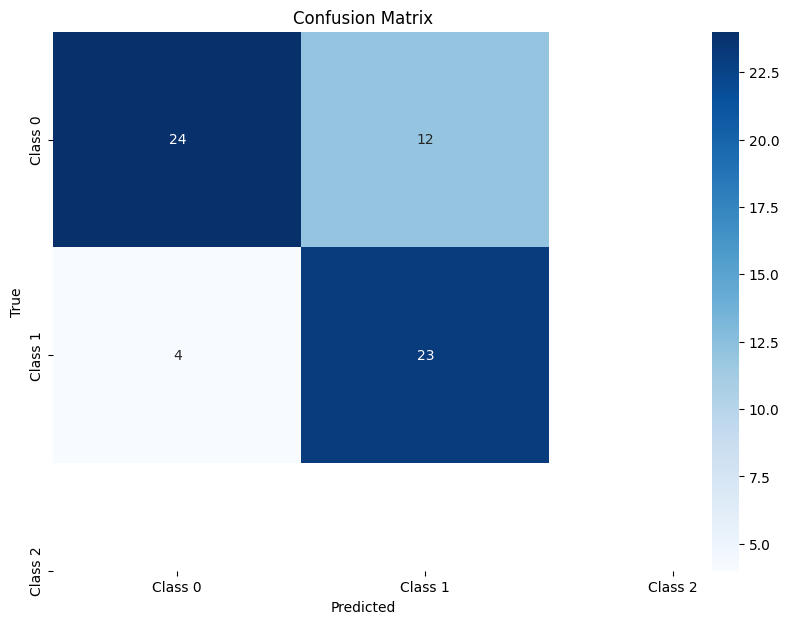

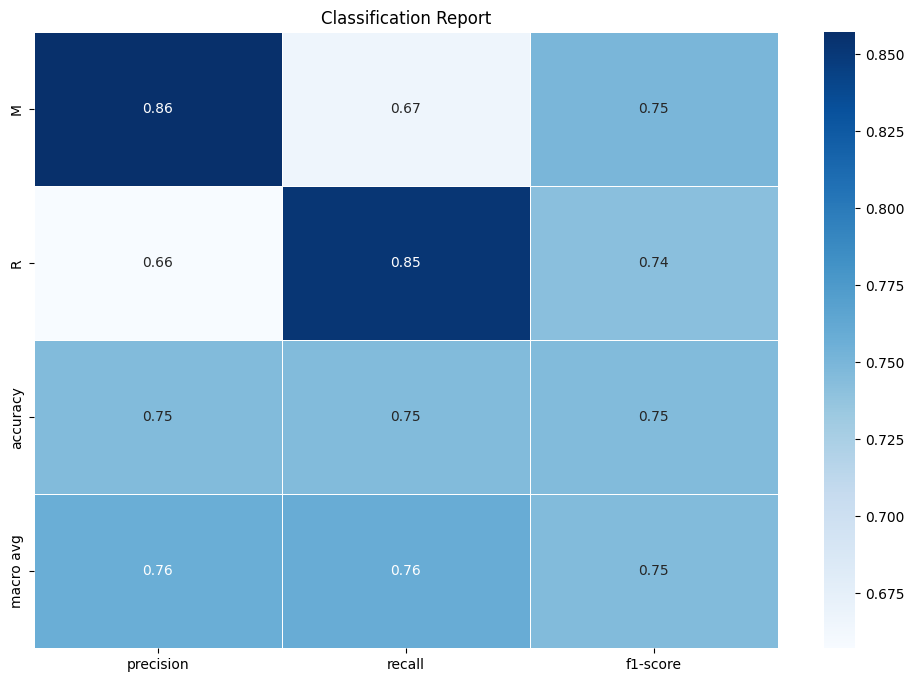

In [45]:

accuracy = accuracy_score(y_test, y_predict)
conf_matrix = confusion_matrix(y_test, y_predict)
class_report = classification_report(y_test, y_predict, output_dict=True)

# Print the metrics
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plot Classification Report
report_df = pd.DataFrame(class_report).transpose()
plt.figure(figsize=(12, 8))
sns.heatmap(report_df.iloc[:-1, :-1].astype(float), annot=True, cmap='Blues',
            cbar=True, linewidths=0.5)
plt.title('Classification Report')
plt.show()